<a href="https://colab.research.google.com/github/jumbokh/Python-Class/blob/master/examples/pandas1029.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 20201029筆記

## python 基礎複習

In [45]:
x = list(range(10))

In [46]:
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [47]:
a = [2, 3]

In [48]:
a

[2, 3]

In [49]:
x[:5]

[0, 1, 2, 3, 4]

In [50]:
x[-5:]

[5, 6, 7, 8, 9]

## 開始使用 pandas

In [51]:
import pandas_datareader.data as web

In [52]:
df = web.DataReader('2330.tw','yahoo','2010-01-01')

In [53]:
df.shape

(2656, 6)

In [54]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,65.000000,64.000000,65.000000,64.900002,39407000.0,44.052135
2010-01-05,65.099998,63.900002,65.000000,64.500000,37138000.0,43.780632
2010-01-06,64.900002,63.700001,64.500000,64.900002,49261000.0,44.052135
2010-01-07,65.000000,64.199997,64.900002,64.199997,42134000.0,43.576996
2010-01-08,64.300003,63.500000,63.500000,64.000000,46076000.0,43.441250


In [55]:
# 取出收盤價
df['Close']

Date
2010-01-04     64.900002
2010-01-05     64.500000
2010-01-06     64.900002
2010-01-07     64.199997
2010-01-08     64.000000
                 ...    
2020-10-23    452.000000
2020-10-26    450.000000
2020-10-27    447.000000
2020-10-28    444.000000
2020-10-29    437.000000
Name: Close, Length: 2656, dtype: float64

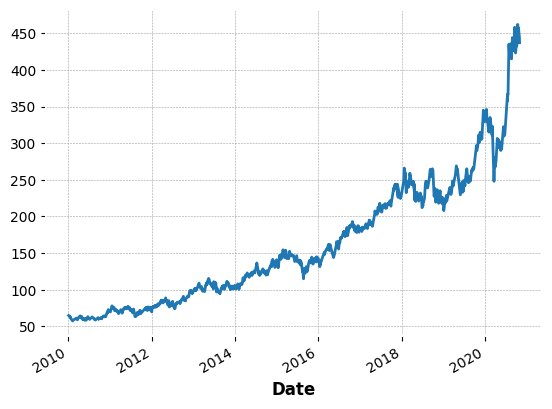

In [56]:
# 繪製收盤價曲線

df['Close'].plot()

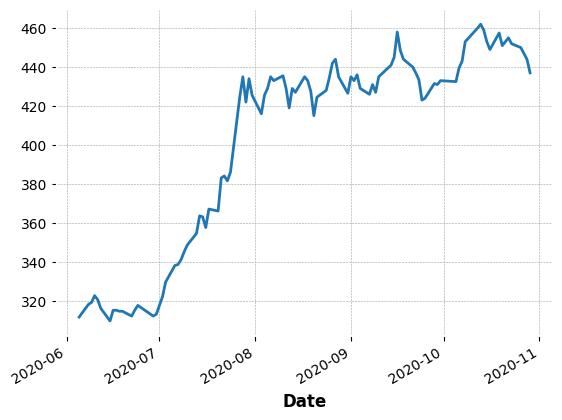

In [57]:
df['Close'][-100:].plot()

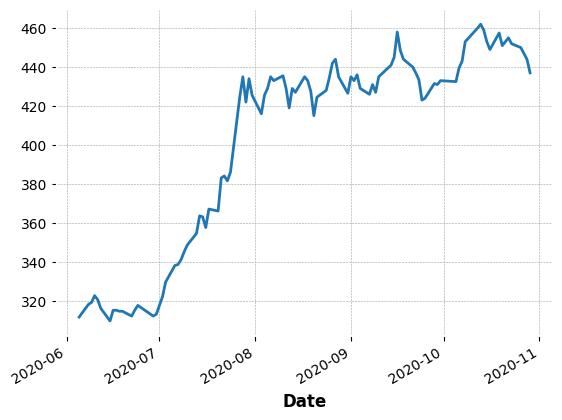

In [58]:
df['Close'].tail(100).plot()

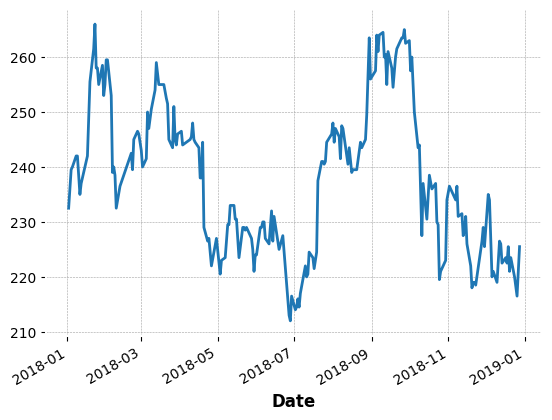

In [59]:
# 擷取2018年 收盤價
df['Close']['2018'].plot()

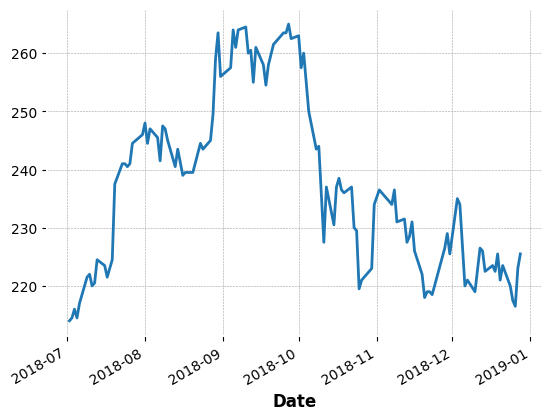

In [60]:
# 擷取2018年 下半年收盤價
df['Close']['2018-07':'2018-12'].plot()

In [61]:
# 計算2010年買進持有到現在 , 資產番幾倍
df['Close'][-1]/df['Close'][0]

6.733435897158586

In [62]:
# 計算2010年投資報酬率
df['Close']['2018'][-1]/df['Close']['2018'][0]

0.9698924731182795

## 讀取 0050成份股

In [63]:
url = "http://www.yuantaetfs.com/api/StkWeights?date=&fundid=1066"

In [64]:
import pandas_datareader.data as web

In [65]:
stock_df = web.DataReader(url)

NotImplementedError: ignored

In [ ]:
for x in stock_df['code']:
  df1 = web.DataReader(str(x)+".tw","yahoo",'2017-01-01')
  ret = df1['Close'][-1]/df1['Close'][0]
  print(x,"==>",ret)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

x = np.linspace(0, 3 * np.pi, 500)
y = np.sin(x)
dydx = np.cos(0.5 * (x[:-1] + x[1:]))  # first derivative

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[0].add_collection(lc)
fig.colorbar(line, ax=axs[0])

# Use a boundary norm instead
cmap = ListedColormap(['r', 'g', 'b'])
norm = BoundaryNorm([-1, -0.5, 0.5, 1], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[1].add_collection(lc)
fig.colorbar(line, ax=axs[1])

axs[0].set_xlim(x.min(), x.max())
axs[0].set_ylim(-1.1, 1.1)
plt.show()

## 使用 mpl_finance

In [ ]:
!pip install --upgrade mplfinance

In [ ]:
import mplfinance as mpf

In [ ]:
mpf.plot(df.tail(100))

In [ ]:
mpf.plot(df.tail(100), type='candle',style="charles")

In [44]:
df.to_excel('test.xlsx')

In [66]:
df['2018'].to_html('test.html')

In [67]:
df['2018'].to_csv('test.csv')